In [1]:
import h5py
from IPython.display import clear_output
from random import shuffle
import matplotlib.patches as mpatches
from mixed_regression_functions import *

In [2]:
import pickle

def save_data_with_pickle(relative_path, data):
    """ Save data using pickle (serialize) """

    with open(relative_path, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def load_data_with_pickle(relative_path):
    """ Load data using pickle (deserialize) """

    with open(relative_path, 'rb') as handle:
        return pickle.load(handle)

In [3]:
from sklearn.model_selection import train_test_split
def get_elmo_datasets(data, test_size):
    X = []
    Y_type = []
    Y_hyperbolic = []
    labels = []
    for key in data.keys():
        for word in data[key]:
            X.append(word)
            labels.append(key)
    
    Y = labels
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    
    labels_train = y_train
    labels_test = y_test
        
    return np.array(X_train), np.array(X_test), labels_train, labels_test


In [4]:
lines = {'40':[], '80':[]}

In [5]:
with open('/datahdd/vmanuel/ELMo/Corpora/40k_dbpedia_sentences.txt', 'r') as inp:
    lines['40k'] = inp.readlines()
    lines['40k'] = [l.split() for l in lines['40k']]
    
with open('/datahdd/vmanuel/ELMo/Corpora/80k_dbpedia_sentences.txt', 'r') as inp:
    lines['80k'] = inp.readlines()
    lines['80k'] = [l.split() for l in lines['80k']]

liness = []
liness = lines['40k']
liness.extend(lines['80k'])
len(liness)

80000

In [6]:
# vectors = {}
# vectors['40k'] = h5py.File('../../../datahdd/vmanuel/ELMo/vectors/40k_elmo_layers.hdf5', 'r')
# vectors['80k'] = h5py.File('../../../datahdd/vmanuel/ELMo/vectors/80k_elmo_layers.hdf5', 'r')
vectors = h5py.File('/datahdd/vmanuel/ELMo/vectors/80k_lines.hdf5', 'r')

In [7]:
# vectorss = {int(k):v[1] for k,v in zip(vectors['40k'].keys(), vectors['40k'].values()) if k != 'sentence_to_index'}

vectorss = {}
i = 0
for k,v in vectors.items():
    if k != 'sentence_to_index':
        vectorss[int(k)] = v
        i += 1
        if i % 1000 == 0:
            clear_output()
            print(i)


80000


In [8]:
unique_words = set([s for sublist in liness for s in sublist])
len(unique_words)

215601

In [9]:
len(liness[4000])

95

In [10]:
len(vectorss[4000][2])

95

### Gli embedding hanno sempre 3 vettori per ogni parola
### vectors ha 40000 x 3 x nparole che corrisponde a frasi x layer x parole_per_frase

## Per ogni frase, prendo il layer 1 e creo un dizionario che ha parola : [vettori], sia per i primi 40k che per i 40k da 40k a 80k

In [8]:
word_vectors = {}
prec = 0
for i, line in enumerate(liness):
    embeddings = vectorss[i][1]
    for word, vec in zip(line, embeddings):
#         if word in all_good_words:
        try:
            word_vectors[word].append(vec)
        except:
            word_vectors[word] = [vec]
    frac = round(i/len(liness), 3)
    if frac != prec:
        prec = frac
        clear_output()
        print(frac)

1.0


In [16]:
sons_of = {}

sons_of['Activity'] = ['Sport'
#                       ,'Game' 
                      ]
sons_of['Agent'] = ['FictionalCharacter']
sons_of['Organisation'] = ['Company'
#                            , 'EducationalInstitution', 'GovernmentAgency', 'PoliticalParty', 'SportsLeague'
                           , 'SportsTeam']
sons_of['Thing'] = [
#     'AnatomicalStructure', 
                    'Award', 'Colour'
                    ,'EthnicGroup', 'Language', 'Plant'
#                     , 'Currency'
                    ,'Weapon']
sons_of['Place'] = ['ArchitecturalStructure', 'Planet']
sons_of['Animal'] = ['Bird'
#                      , 'Crustacean'
#                      , 'Fish', 'Amphibian' 
                     , 'Insect', 'Mammal'
#                      , 'Mollusca', 'Reptile'
                    ]
# sons_of['Person'] = ['Artist', 'Scientist'
#                     ,'Athlete', 'Writer'
#                     ]

In [17]:
types = ['dbo:' + s for sublist in sons_of.values() for s in sublist]

classes = [x.replace('dbo:', '') for x in types]

# types = ['dbo:Mammal'
#          , 'dbo:Planet'
#          , 'dbo:Company'
# #     , 'dbo:Broadcaster'
#          , 'dbo:City'
#          , 'dbo:Plant'
# #          , 'dbo:Conifer'
# #          , 'dbo:FloweringPlant'
#          , 'dbo:AnatomicalStructure'
# #          , 'dbo:Food'
# #          , 'dbo:Aircraft'
# #          , 'dbo:Automobile'
# #          ,'dbo:Animal'
# #          , 'dbo:Bird'
# #          , 'dbo:Fish'
# #          , 'dbo:Crustacean'
# #          , 'dbo:Software'
# #          , 'dbo:Politician'
#         ]

In [18]:
words = []
i = 0
for t in types:
    w = get_from_class(t)
    w.append(t.replace('dbo:', ''))
    words.append(w) 
    clear_output()
    i += 1
    print(round(i/len(types), 3))

1.0


In [19]:
len(words)

15

In [20]:
good_words = [[] for i in range(len(words))]
i = 0
j = 0
for type_index, type_words in enumerate(words):
    for word in type_words:
#         try:
#             word_vectors[word.lower()]
# #             word_vectors_2[word.lower()]
#             good_words[type_index].append(word.lower())
#         except:
        if word.lower() in unique_words:
            good_words[type_index].append(word.lower())
        else:
            i += 1
            

print('{} found on {}'.format(sum([len(x) for x in words]) - i + j, 
                              sum([len(x) for x in words])))

all_good_words = [item for sublist in good_words for item in sublist] 

dataset = {}
for t, type_words in zip(types, good_words):
    dataset.update({t.replace('dbo:', '') : [m for m in type_words]})

for k, w in zip(dataset.keys(), dataset):
    print('{} {}'.format(len(dataset[k]), k))   

4906 found on 126929
116 Sport
972 FictionalCharacter
1032 Company
23 SportsTeam
23 Award
41 Colour
539 EthnicGroup
205 Language
941 Plant
139 Weapon
112 ArchitecturalStructure
58 Planet
176 Bird
247 Insect
282 Mammal


## Update dataset with composite words

In [21]:
comp_word_indexes = load_data_with_pickle('/datahdd/vmanuel/datasets/composite_words_index')

In [22]:
updated = []
# for entry in comp_word_indexes:
#     if entry[0] not in updated:
#         updated.append(entry[0])
#         dataset[entry[3]].append(entry[0])

        
for k, v in comp_word_indexes.items():
    dataset[v[0]].append(k)
    
for k, w in zip(dataset.keys(), dataset):
    print('{} {}'.format(len(dataset[k]), k))   

265 Sport
1567 FictionalCharacter
2133 Company
230 SportsTeam
151 Award
61 Colour
756 EthnicGroup
502 Language
1248 Plant
253 Weapon
674 ArchitecturalStructure
84 Planet
285 Bird
300 Insect
432 Mammal


In [23]:
save_data_with_pickle('/datahdd/vmanuel/datasets/word_and_composite_dataset', dataset)

### Retrieve Minimal Type

In [24]:
dataset = load_data_with_pickle('/datahdd/vmanuel/datasets/minimal_type_dataset')

## Create Dataset

In [25]:
train, test, labels_train, labels_test = get_elmo_datasets(dataset, 0.2)

datatest = {c:[] for c in classes}

for y, w in zip(labels_test, test):
    datatest[y].append(w)
    
val, test, labels_val, labels_test = get_elmo_datasets(datatest, 0.5)

In [26]:
len(train)

7021

In [27]:
len(test)

878

In [28]:
len(val)

878

In [29]:
X_train = []
Y_train = []
word_train = []

tot = len(train)
av = 0
ks = comp_word_indexes.keys()
for j, (word, label) in enumerate(zip(train, labels_train)):
    if word in ks:
        vecs = []
        for v in comp_word_indexes[word][1:]:
#             print('v[1]: {}, v[0][0]: {}, v[0][1]: {}'.format(v[1], v[0][0], v[0][1]))
            vecs.append((vectorss[v[1]][1][v[0][0]] + vectorss[v[1]][1][v[0][1]]) / 2)
    else:
        vecs = word_vectors[word]
#     vecs = word_vectors_2[word]
    for i, v in enumerate(vecs):
        X_train.append(v)
        Y_train.append(label)
        word_train.append('{}_{}'.format(word,i))

    if round(j/tot, 2) != av:
        clear_output()
        av = round(j/tot, 2)
        print(av)

1.0


In [30]:
X_test = []
Y_test = []
word_test = []

tot = len(test)
av = 0
ks = comp_word_indexes.keys()

for j, (word, label) in enumerate(zip(test, labels_test)):
    if word in comp_word_indexes.keys():
        vecs = []
        for v in comp_word_indexes[word][1:]:
            vecs.append((vectorss[v[1]][1][v[0][0]] + vectorss[v[1]][1][v[0][1]]) / 2)
    else:
        vecs = word_vectors[word]
#     vecs = word_vectors_2[word]
    for i, v in enumerate(vecs):
        X_test.append(v)
        Y_test.append(label)
        word_test.append('{}_{}'.format(word,i))
        
    if round(j/tot, 2) != av:
        clear_output()
        av = round(j/tot, 2)
        print(av)

1.0


In [31]:
X_val = []
Y_val = []
word_val = []

tot = len(val)
av = 0
ks = comp_word_indexes.keys()

for j, (word, label) in enumerate(zip(val, labels_val)):
    if word in comp_word_indexes.keys():
        vecs = []
        for v in comp_word_indexes[word][1:]:
            vecs.append((vectorss[v[1]][1][v[0][0]] + vectorss[v[1]][1][v[0][1]]) / 2)
    else:
        vecs = word_vectors[word]
#     vecs = word_vectors_2[word]
    for i, v in enumerate(vecs):
        X_val.append(v)
        Y_val.append(label)
        word_val.append('{}_{}'.format(word,i))
        
    if round(j/tot, 2) != av:
        clear_output()
        av = round(j/tot, 2)
        print(av)

1.0


In [32]:
A = [[x, y, w] for x,y,w in zip(X_train, Y_train, word_train)]
shuffle(A)
X_train = [x[0] for x in A]
Y_train = [x[1] for x in A]
word_train = [x[2] for x in A]

A = [[x, y, w] for x,y,w in zip(X_test, Y_test, word_test)]
shuffle(A)
X_test = [x[0] for x in A]
Y_test = [x[1] for x in A]
word_test = [x[2] for x in A]


A = [[x, y, w] for x,y,w in zip(X_val, Y_val, word_val)]
shuffle(A)
X_val = [x[0] for x in A]
Y_val = [x[1] for x in A]
word_val = [x[2] for x in A]


In [33]:
from collections import Counter
Tr = Counter(Y_train).most_common()
Te = Counter(Y_test).most_common()
Va = Counter(Y_val).most_common()

print('{:^30}|{:^30}|{:^30}'.format('Train','Val', 'Test'))
print('{:-^30}|{:-^30}|{:-^30}'.format('', '', ''))

for x, y, z in zip(Tr, Va, Te):
    print('{:^25}{:^5}|{:^25}{:^5}|{:^25}{:^5}'.format(x[0], x[1], y[0], y[1], z[0], z[1]))

            Train             |             Val              |             Test             
------------------------------|------------------------------|------------------------------
         Company         39026|          Award          2709 |        Language         4147 
        Language         20319|         Planet          1976 |         Company         2913 
          Plant          15395|         Company         1507 |          Plant          1664 
         Mammal          9555 |          Plant          1419 | ArchitecturalStructure  1177 
         Colour          8872 |   FictionalCharacter    1297 |         Mammal           975 
   FictionalCharacter    7841 |         Mammal          1007 |   FictionalCharacter     760 
       EthnicGroup       7556 |        Language          999 |       EthnicGroup        446 
 ArchitecturalStructure  5736 |          Sport           640 |          Sport           438 
          Sport          4787 | ArchitecturalStructure   429 |        

In [34]:
import re
unique = {c: [] for c in classes}
pat = re.compile('[a-z]*')
for i, w in enumerate(word_train):
    w = re.findall(pat, w)[0]
    if w not in unique[Y_train[i]]:
        unique[Y_train[i]].append(w)

In [35]:
for c in unique.keys():
    print('{} {}'.format(c, list(Counter(unique[c]))[:10]))

Sport ['softball', 'cricket', 'fishing', 'prevent', 'golf', 'advocacy', 'american', 'surfing', 'baseball', 'sport']
FictionalCharacter ['isis', 'centaur', 'juliet', 'recurring', 'donald', 'antigone', 'prometheus', 'mario', 'heracles', 'superhero']
Company ['company', 'bayer', 'industry', 'next', 'briefs', 'cray', 'cyclotron', 'agribusiness', 'seat', 'science']
SportsTeam ['cleveland', 'oakland', 'norfolk', 'atlanta', 'gundam', 'chicago', 'star', 'stargate', 'dallas', 'dundee']
Award ['best', 'prize', 'fields', 'civil', 'wedding', 'literary', 'scholarship', 'hugo', 'christening', 'academy']
Colour ['red', 'white', 'green', 'black', 'colour', 'brown', 'blue', 'magenta', 'yellow', 'purple']
EthnicGroup ['refugee', 'moors', 'americans', 'djiboutian', 'koyukon', 'sikh', 'angles', 'ukrainians', 'arawak', 'shinto']
Language ['c', 'old', 'maclisp', 'latin', 'great', 'hindi', 'language', 'arabic', 'r', 'vernacular']
Plant ['evergreen', 'major', 'weed', 'subfamily', 'marjoram', 'fabaceae', 'appl

(-8.185731887817383, 9.240092277526855)

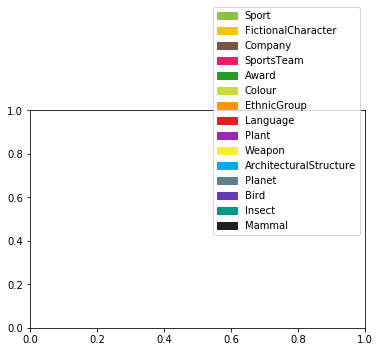

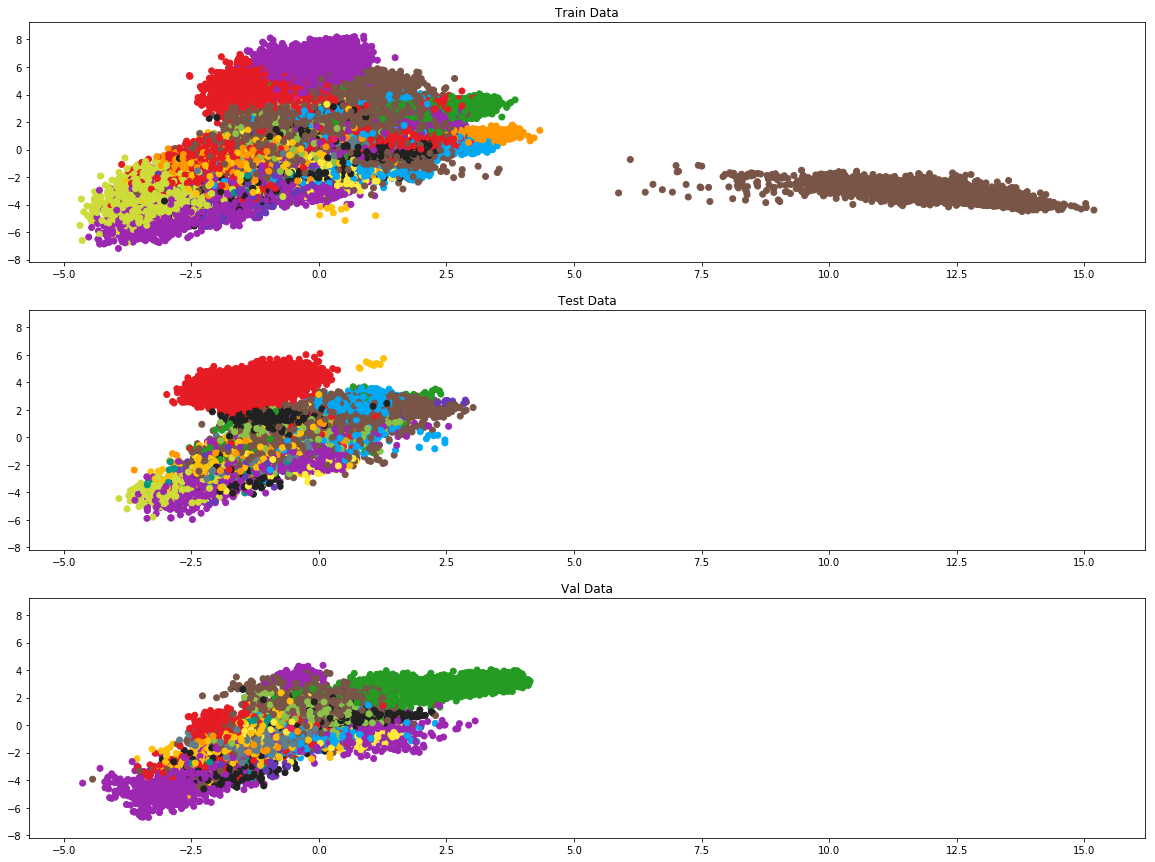

In [36]:
from sklearn.decomposition import PCA

colors = ['#8bc34a', '#ffc107', '#795548',
          '#e91e63', '#259b24', '#cddc39',
          '#ff9800', '#e51c23', '#9c27b0',
          '#ffeb3b', '#03a9f4', '#607d8b',
          '#673ab7', '#009688', '#212121',
          '#ffff00', '#A52A2A']
color_map = {cla: col for cla, col in zip(classes, colors)}

verbose_color = ['Light Green', 'Amber', 'Deep Orange',
                 'Pink', 'Green', 'Lime',
                 'Orange', 'Red', 'Purple',
                 'Indigo', 'Light Blue', 'Blue Grey',
                 'Deep Purple', 'Teal', 'Text Black',
                 'Yellow', 'Brown']
verbose_color_map = {x: y for x,y in zip(color_map.keys(), verbose_color)}
patchList = []

for key in verbose_color_map.keys():
    data_key = mpatches.Patch(color=color_map[key], label=key)
    patchList.append(data_key)
plt.legend(handles=patchList, bbox_to_anchor=(1, 1.5))


train_colors = [color_map[k] for k in Y_train]
test_colors = [color_map[k] for k in Y_test]
val_colors = [color_map[k] for k in Y_val]


sklearn_pca = PCA(n_components=2)
        
sklearn_pca.fit(np.concatenate((X_train, X_test, X_val), axis = 0))

data = sklearn_pca.transform(X_train)
X_plot = [x[0] for x in data]
Y_plot = [x[1] for x in data]

data_test = sklearn_pca.transform(X_test)
X_test_plot = [x[0] for x in data_test]
Y_test_plot = [x[1] for x in data_test]

data_test = sklearn_pca.transform(X_val)
X_val_plot = [x[0] for x in data_test]
Y_val_plot = [x[1] for x in data_test]


X_min = min(np.append(np.append(X_plot, X_test_plot), X_val_plot))
X_max = max(np.append(np.append(X_plot, X_test_plot), X_val_plot))
Y_min = min(np.append(np.append(Y_plot, Y_test_plot), Y_val_plot))
Y_max = max(np.append(np.append(Y_plot, Y_test_plot), Y_val_plot))

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (20, 15))

ax1.scatter(X_plot, Y_plot, c = train_colors)
ax1.set_title('Train Data')

ax1.set_xlim(X_min - 1, X_max + 1)
ax1.set_ylim(Y_min - 1, Y_max + 1)

ax2.scatter(X_test_plot, Y_test_plot, c = test_colors)
ax2.set_title('Test Data')    

ax2.set_xlim(X_min - 1, X_max + 1)
ax2.set_ylim(Y_min - 1, Y_max + 1)

ax3.scatter(X_val_plot, Y_val_plot, c = val_colors)
ax3.set_title('Val Data')    

ax3.set_xlim(X_min - 1, X_max + 1)
ax3.set_ylim(Y_min - 1, Y_max + 1)

# plt.savefig('./im/48_classes/classes_1_dataset')

In [64]:
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/17_classes/X_train', np.array(X_train))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/17_classes/Y_train', np.array(Y_train))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/17_classes/word_train', np.array(word_train))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/17_classes/Y_test', np.array(Y_test))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/17_classes/X_test', np.array(X_test))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/17_classes/word_test', np.array(word_test))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/17_classes/Y_val', np.array(Y_val))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/17_classes/X_val', np.array(X_val))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/17_classes/word_val', np.array(word_val))

In [37]:
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/15_classes/X_train', np.array(X_train))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/15_classes/Y_train', np.array(Y_train))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/15_classes/word_train', np.array(word_train))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/15_classes/Y_test', np.array(Y_test))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/15_classes/X_test', np.array(X_test))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/15_classes/word_test', np.array(word_test))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/15_classes/Y_val', np.array(Y_val))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/15_classes/X_val', np.array(X_val))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_1/15_classes/word_val', np.array(word_val))

## Per ogni frase, prendo il layer 2 e creo un dizionario che ha parola : [vettori], per i primi 80k

In [10]:
word_vectors_2 = {}
for i, line in enumerate(liness):
    embeddings = vectorss[i][2]
    for word, vec in zip(line, embeddings):
        try:
            word_vectors_2[word].append(vec)
        except:
            word_vectors_2[word] = [vec]
    if (i + 1) % 1000 == 0:
        clear_output()
        print(i + 1)

80000


In [35]:
train, test, labels_train, labels_test = get_elmo_datasets(dataset, 0.1)

X_train = []
Y_train = []
word_train = []

for word, label in zip(train, labels_train):
    vecs = word_vectors_2[word]
    for i, v in enumerate(vecs):
        X_train.append(v)
        Y_train.append(label)
        word_train.append('{}_{}'.format(word,i))
        
X_test = []
Y_test = []
word_test = []

for word, label in zip(test, labels_test):
    vecs = word_vectors_2[word]
    for i, v in enumerate(vecs):
        X_test.append(v)
        Y_test.append(label)
        word_test.append('{}_{}'.format(word,i))
                          

A = [[x, y, w] for x,y,w in zip(X_train, Y_train, word_train)]
shuffle(A)
X_train = [x[0] for x in A]
Y_train = [x[1] for x in A]
word_train = [x[2] for x in A]

A = [[x, y, w] for x,y,w in zip(X_test, Y_test, word_test)]
shuffle(A)
X_test = [x[0] for x in A]
Y_test = [x[1] for x in A]
word_test = [x[2] for x in A]


In [36]:
from collections import Counter
Tr = Counter(Y_train).most_common()
Te = Counter(Y_test).most_common()

print('{:^25}|{:^25}'.format('Train', 'Test'))
print('{:-^25}|{:-^25}'.format('', ''))

for x, y in zip(Tr, Te):
    print('{:^20}{:^5}|{:^20}{:^5}'.format(x[0], x[1], y[0], y[1]))

          Train          |          Test           
-------------------------|-------------------------
AnatomicalStructure 48905|      Company       11541
        City        29142|        City        4235 
      Company       25559|AnatomicalStructure 3905 
       Plant        15662|       Mammal       2241 
       Mammal       9025 |       Plant        1108 
       Planet       4078 |       Planet        233 


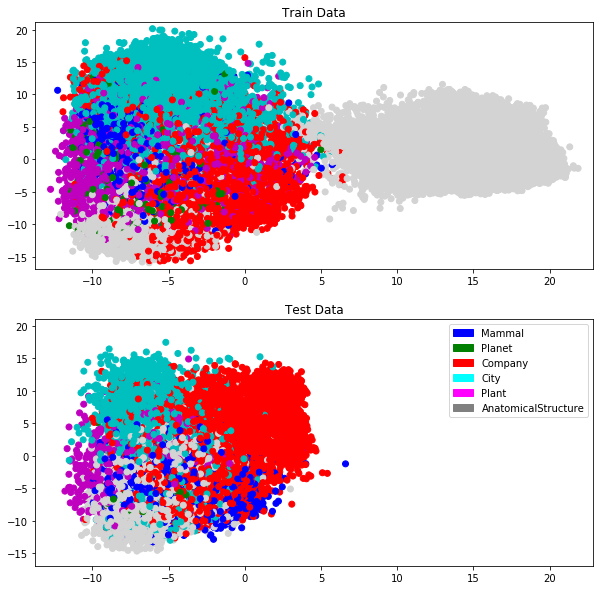

In [37]:
from sklearn.decomposition import PCA

colors = ['b', 'g', 'r', 'c', 'm', '#d3d3d3', 'k', '#964b00', '#ffa500', 'tab:orange', 'tab:pink']
color_map = {cla: col for cla,col in zip(classes, colors)}

train_colors = [color_map[k] for k in Y_train]
test_colors = [color_map[k] for k in Y_test]
    

sklearn_pca = PCA(n_components=2)
        
sklearn_pca.fit(np.concatenate((X_train, X_test), axis = 0))

data = sklearn_pca.transform(X_train)
X_plot = [x[0] for x in data]
Y_plot = [x[1] for x in data]

data_test = sklearn_pca.transform(X_test)
X_test_plot = [x[0] for x in data_test]
Y_test_plot = [x[1] for x in data_test]

X_min = min(np.append(X_plot, X_test_plot))
X_max = max(np.append(X_plot, X_test_plot))
Y_min = min(np.append(Y_plot, Y_test_plot))
Y_max = max(np.append(Y_plot, Y_test_plot))

# X_min = min(X_test_plot)
# X_max = max(X_test_plot)
# Y_min = min(Y_test_plot)
# Y_max = max(Y_test_plot)

f, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))

ax1.scatter(X_plot, Y_plot, c = train_colors)
ax1.set_title('Train Data')

ax1.set_xlim(X_min - 1, X_max + 1)
ax1.set_ylim(Y_min - 1, Y_max + 1)

ax2.scatter(X_test_plot, Y_test_plot, c = test_colors)
ax2.set_title('Test Data')    

ax2.set_xlim(X_min - 1, X_max + 1)
ax2.set_ylim(Y_min - 1, Y_max + 1)

verbose_color = ['Blue', 'Green', 'Red', 'Cyan', 'Magenta', 'Grey', 'Black', 'Brown', 'Orange', 'Pink']
verbose_color_map = {x: y for x,y in zip(color_map.keys(), verbose_color)}
patchList = []
for key in verbose_color_map.keys():
    data_key = mpatches.Patch(color=verbose_color_map[key], label=key)
    patchList.append(data_key)
plt.legend(handles=patchList, bbox_to_anchor=(1, 1))

In [38]:
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_2/80k_full/X_train', np.array(X_train))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_2/80k_full/Y_train', np.array(Y_train))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_2/80k_full/word_train', np.array(word_train))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_2/80k_full/Y_test', np.array(Y_test))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_2/80k_full/X_test', np.array(X_test))
save_data_with_pickle('/datahdd/vmanuel/datasets/elmo_layer_2/80k_full/word_test', np.array(word_test))

### Retrieve Invention Vectors

In [208]:
words_to_invent = load_data_with_pickle('/datahdd/vmanuel/datasets/words_to_invent')
classes_to_invent = load_data_with_pickle('/datahdd/vmanuel/datasets/classes_to_invent')

In [209]:
good_invention_words = [[] for i in range(len(words_to_invent))]
i = 0
j = 0
for type_index, type_words in enumerate(words_to_invent):
    for word in type_words:
        try:
            word_vectors[word.lower()]
            good_invention_words[type_index].append(word.lower())
        except:
            i += 1

print('{} found on {}'.format(sum([len(x) for x in words_to_invent]) - i + j, sum([len(x) for x in words_to_invent])))

all_words = [item for sublist in good_invention_words for item in sublist] 

invention_dataset = {}
for t, type_words in zip(classes_to_invent, good_invention_words):
    invention_dataset.update({t.replace('dbo:', '') : [m for m in type_words]})

for k, w in zip(invention_dataset.keys(), invention_dataset):
    print('{} {}'.format(len(invention_dataset[k]), k))   

493 found on 62149
8 Currency
23 Amphibian
43 Crustacean
11 SportsLeague
56 Mollusca
64 Game
37 GovernmentAgency
56 Reptile
10 EducationalInstitution
185 Fish


In [211]:
k_to_del = []
print(len(invention_dataset))
for k,v in zip(invention_dataset.keys(), invention_dataset.values()):
    if v == []:
        k_to_del.append(k)
for k in k_to_del:
    del invention_dataset[k]
print(len(invention_dataset))


10
10


In [212]:
import numpy as np
invention_train, invention_test, labels_invention_train, labels_invention_test = get_elmo_datasets(invention_dataset, 0.1)

X_invention_train = []
Y_invention_train = []
word_invention_train = []

for word, label in zip(invention_train, labels_invention_train):
    vecs = word_vectors[word]
    for i, v in enumerate(vecs):
        X_invention_train.append(v)
        Y_invention_train.append(label)
        word_invention_train.append('{}_{}'.format(word,i))
        
X_invention_test = []
Y_invention_test = []
word_invention_test = []

for word, label in zip(invention_test, labels_invention_test):
    vecs = word_vectors[word]
    for i, v in enumerate(vecs):
        X_invention_test.append(v)
        Y_invention_test.append(label)
        word_invention_test.append('{}_{}'.format(word,i))
                          

A = [[x, y, w] for x,y,w in zip(X_invention_train, Y_invention_train, word_invention_train)]
shuffle(A)
X_invention_train = [x[0] for x in A]
Y_invention_train = [x[1] for x in A]
word_invention_train = [x[2] for x in A]

A = [[x, y, w] for x,y,w in zip(X_invention_test, Y_invention_test, word_invention_test)]
shuffle(A)
X_invention_test = [x[0] for x in A]
Y_invention_test = [x[1] for x in A]
word_invention_test = [x[2] for x in A]
X_invention_train.extend(X_invention_test)
Y_invention_train.extend(Y_invention_test)
word_invention_train.extend(word_invention_test)


In [213]:
save_data_with_pickle('/datahdd/vmanuel/datasets/invention_datasets/16_classes/X_invention_1', np.array(X_invention_train))
save_data_with_pickle('/datahdd/vmanuel/datasets/invention_datasets/16_classes/Y_invention_1', np.array(Y_invention_train))
save_data_with_pickle('/datahdd/vmanuel/datasets/invention_datasets/16_classes/word_invention_1', np.array(word_invention_train))


## Quality Dataset

In [15]:
len(word_vectors['algae'])

112

In [18]:
quality_words = ['alchemy', 'beaver', 'jpeg', 'algae']

In [19]:
for w in quality_words:
    print('{} : {}'.format(w, len(word_vectors[w])))

alchemy : 17
beaver : 194
jpeg : 29
algae : 112


In [20]:
quality_vectors = []
quality_labels = []
for w in quality_words:
    for v in word_vectors[w]:
        quality_vectors.append(v)
        quality_labels.append(w)

In [21]:
save_data_with_pickle('/datahdd/vmanuel/datasets/invention_datasets/17_classes/quality_vectors', np.array(quality_vectors))
save_data_with_pickle('/datahdd/vmanuel/datasets/invention_datasets/17_classes/quality_labels', quality_labels)